

## Случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. 
##  Центральная предельная теорема





Библиотеки 


Numpy - эффективные вычисления с векторами и матрицами, преобразования Фурье, линейная алгебра, интеграция с C/C++ и Fortran и прочее.
Pandas - реализация эффективных структур для анализа данных, в том числе популярного аналога DataFrame. Предназначена для данных разной природы - матричных, панельных данных, временных рядов. Претендует на звание самого мощного и гибкого средства для анализа данных с открытым исходным кодом.

Scikit-learn - реализация очень многих методов машинного обучения и интеллекуального анализа данных (data mining) с отличной документацией.

matplotlib - для визаулизации данных, в основном двухмерная графика. Построена на принципах ООП, но имеет процедурный интерфейс pylab, который предоставляет аналоги команд MATLAB.

SciPy - это библиотека для Python, содержащая множество математических алгоритмов и предназначенная для выполнения научных расчётов. С его помощью можно решать широкий класс математических задач, возникающих в ходе научной деятельности.


Модуль scipy.stats предоставляет множество инструментов для статистических исследований. В данном реализовано более 80 непрерывных и 10 дискретных распределений.

Основные методы для непрерывных случайных величин:

rvs: генерация выборки из данного распределения

pdf: функция плотности распределения

cdf: функция распределения

ppf: функция, обратная к функции распределения (используется для подсчёта квантилей)

stats: возвращает основные характеристики случайной величины

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline


### `scipy.stats`

В модуле `scipy.stats` содержатся реализации основных функций для различных распределений:

* `binom` — биномиальное,
* `poisson` — Пуассоновское,
* `norm` — нормальное,
* `uniform` — непрерывное равномерное,
* `t` — распределение Стьюдента (о нём позже)

и др. Доступные функции:

* `pmf` — закон распределения для дискретных величин,
* `pdf` — функция плотности для непрерывных величин,
* `cdf` — функция распределения,
* `ppf` — квантильная функция (обратная к функции распределения)

и др. Например, с помощью этого модуля можно получить значения функции нормального распределения, которая не вычисляется аналитично и доступна лишь численно.

### Дискретные случайные величины

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [2]:
sample = np.random.choice([1,2,3,4,5,6], 100)
sample

array([3, 1, 3, 5, 3, 1, 4, 2, 2, 3, 2, 6, 6, 1, 6, 3, 6, 4, 4, 6, 1, 5,
       6, 4, 5, 4, 6, 6, 5, 3, 3, 1, 5, 5, 5, 2, 3, 3, 6, 5, 1, 5, 6, 1,
       5, 6, 6, 1, 4, 5, 5, 3, 6, 2, 6, 6, 3, 3, 2, 1, 5, 2, 3, 4, 3, 6,
       2, 1, 3, 1, 1, 5, 3, 5, 5, 2, 4, 4, 1, 1, 1, 3, 2, 3, 6, 2, 6, 3,
       4, 1, 6, 1, 6, 4, 2, 6, 3, 3, 5, 4])

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [8]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter()
for s in sample:
    c[s] += 1

print("Число выпадений каждой из сторон:")    
print(c, '\n')

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})



Число выпадений каждой из сторон:
Counter({3: 21, 6: 21, 1: 17, 5: 17, 4: 12, 2: 12}) 

Вероятности выпадений каждой из сторон:
{3: 0.21, 1: 0.17, 5: 0.17, 4: 0.12, 2: 0.12, 6: 0.21}


Это и есть оценка функции вероятности дискретного распределения.

### Распределение Бернулли¶

Генерация выборок из распределения Бернулли с заданным параметром  𝑝 :

In [9]:
bernoulli_rv = sts.bernoulli(0.7)

bernoulli_rv.rvs(10)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

 ### Биномиальное распределение

In [15]:
binomial_rv = sts.binom(20, 0.7)
binomial_rv.rvs(10)

array([14, 15, 17, 14, 12, 15,  8, 13, 11, 15])

Первый аргумент функции binom — значение параметра 𝑛 , второй — параметра 𝑝 .

Функция распределения:

Text(0.5, 0, '$x$')

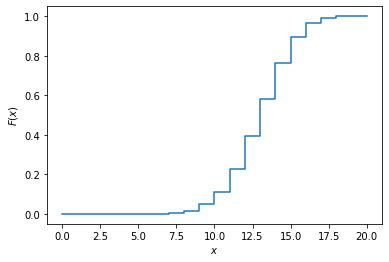

In [18]:
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x)
plt.step(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция вероятности pmf для дискретных случайных величин заменяет функцию плотности pdf:

Text(0.5, 0, '$x$')

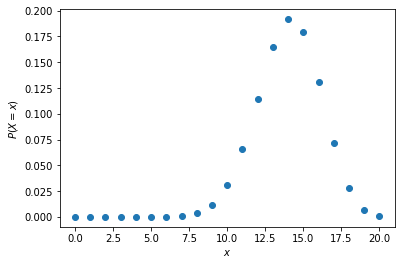

In [19]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

Text(0.5, 0, '$x$')

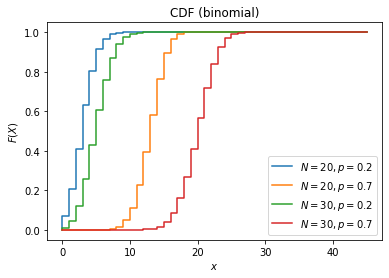

In [20]:
x = np.linspace(0,45,46)
for N in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("CDF (binomial)")

plt.ylabel('$F(X)$')
plt.xlabel('$x$')


### Непрерывные случайные величины.
#### Нормальное распределение

Функции распределения и плотности принимают на вход массив библиотеки Numpy

Все непрерывные распределения принимают на вход два параметра loc (от location) и scale. Для нормального распределения они определяют матожидание и стандартное отклонение. Для других видов распределений они будут соответствовать подходящим параметрам, указанным в документации. Например, для гамма распределения scale = 1.0 / lambda, где lambda - параметр распределения.


Рассмотрим пример двухмерного нормального распределения (его можно использовать, например, для генерации модельных двухмерных данных, которые удобно визуализировать):

In [21]:
!pip install stats

     |████████████████████████████████| 127 kB 5.2 MB/s 
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24299 sha256=b426b76d5ca9a76b8affac75f127357230037d584fe2fc28d6384e8dbdae9f52
  Stored in directory: /root/.cache/pip/wheels/e3/1c/58/620049eecc13fb5b4920470895e07a39f86e889a0a58b11976
Successfully built stats


/usr/local/lib/python3.7/dist-packages/scipy/stats/_multivariate.py:660: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


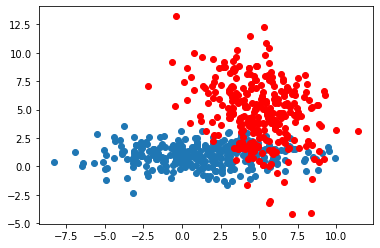

In [22]:
import numpy as np
# Mean of the MVN distribution
m1 = np.array([1, 1])
# Covariance matrix of the MVN distribution (should be positive-definite!)
S1 = np.diag(np.array([10, 1])) 
m2 = np.array([5, 5])
S2 = np.array([[5, -5], [1, 5]])

X = sts.multivariate_normal.rvs(m1, S1, size = 300)
Y = sts.multivariate_normal.rvs(m2, S2, size = 300)

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(Y[:, 0], Y[:, 1], color = 'r')
plt.show()


Где это нужно: Преобразование признаков, поиск выбросов в данныx

_Пример 2_
Сгенерируем выборку объёма 100 из стандартного нормального распределения (с  𝜇 =0 и  𝜎2 =1):
Параметр loc задаёт  𝜇 , scale — среднеквадратичное отклонение  𝜎 , size — размер выборки. Имя параметра size при вызове функции rvs можно не писать.

In [23]:
mu = 0
sigma = 2

# зададим нормально распределенную случайную величину


# сгенерируем 100 значений

norm_rv = sts.norm(mu, sigma)
sample = norm_rv.rvs(100)
sample

array([ 1.64214507,  1.79128943,  2.66261796, -1.03911358,  0.76294796,
       -1.8576734 ,  1.91290485,  2.70779653, -1.43252084,  1.09782661,
       -0.87657279,  0.60507957,  1.90041644,  0.52919793, -0.79840441,
        0.19744689, -1.64409111, -0.31650187, -3.5422652 , -0.43777994,
        4.32679839,  1.85514396,  2.83043676,  0.90734315, -1.48243422,
        2.02144516,  0.89840523, -1.32387788,  3.8288382 ,  2.60796705,
       -2.09880519,  3.14523358,  2.38385019,  0.27057792, -0.28097602,
       -0.25516195, -1.58517901, -0.18864521,  0.25238851,  0.36703447,
        2.44427018, -3.10329591,  1.0744304 , -3.81510984, -2.54717073,
        2.25394291, -0.11964188, -3.44903515, -3.25146539,  1.14494055,
       -0.91742857, -1.32599342, -1.09810724,  1.71354437,  0.69657392,
       -0.31582186, -1.47661584,  0.91740574,  0.41992722, -2.70514347,
       -2.56824796, -0.48611317,  1.40619261, -1.63544861, -0.78775205,
        1.13587995, -3.21927028, -2.49466625,  0.88210069,  0.86

Эмпирическая функция распределения для полученной выборки:

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


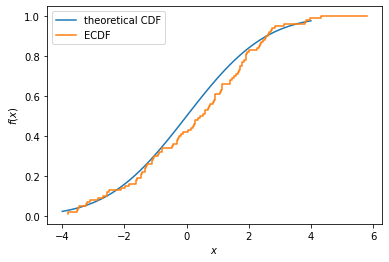

In [24]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x) # функция может принимать и вектор (x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

Text(0.5, 0, '$x$')

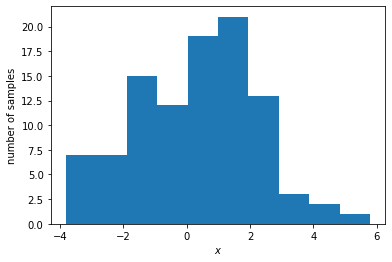

In [25]:
plt.hist(sample)
plt.ylabel('number of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную: 3, затем самостоятельно 40

Text(0.5, 0, '$x$')

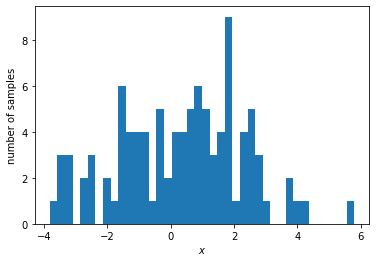

In [26]:
plt.hist(sample, bins=40)
plt.ylabel('number of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

Text(0.5, 0, '$x$')

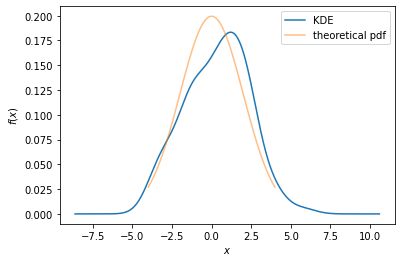

In [27]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую функцию распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

__Пример 2_

Рассмотрим опять данные по хоккеистам и построим по ним _эмпирическую_ (т.е. полученную опытным путём) функцию распределения возраста хоккеистов.

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 12, 8

In [29]:

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
   print('User uploaded file «{name}» with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving hockey_players.csv to hockey_players.csv
User uploaded file «hockey_players.csv» with length 748110 bytes


In [30]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])

df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [31]:
def edf(samples, x: float) -> float:
    """Эмпирическая функция распределения (empirical distribution
    function).
    """
    
    return samples[samples < x].shape[0] / samples.shape[0]

С помощью `matplotlib` построим график данной функции в пределах от $10$ до $50$.

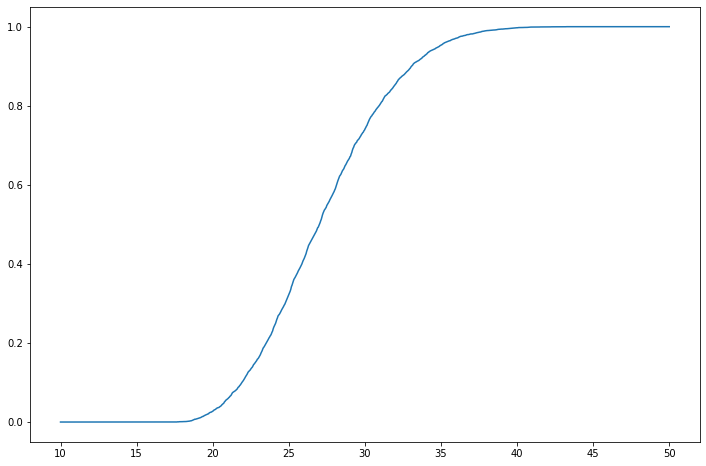

In [ ]:
ox = np.linspace(10, 50, 1000)
oy = np.array([edf(df['age'], x) for x in ox])

plt.plot(ox, oy)



Плотность распределения можно визуализировать с помощью гистограммы, передав в неё значение параметра `density=True`.

__Пример 2__

Построим гистограмму значений возраста хоккеистов, чтобы примерно представить, как выглядит соответствующая функция плотности распределения.

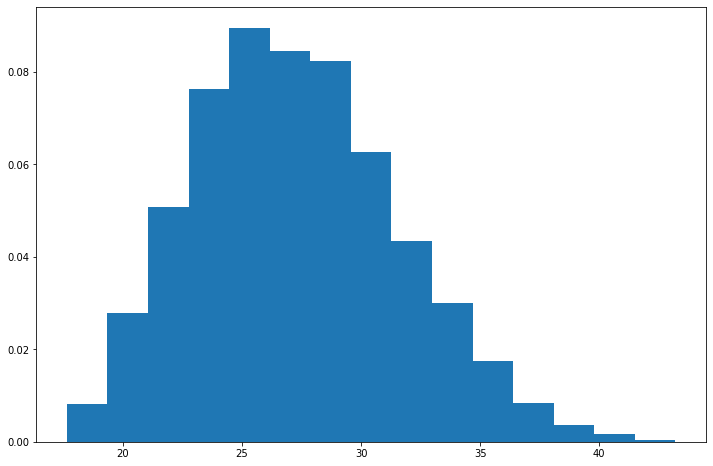

In [32]:
plt.hist(df['age'], density=True, bins=15)
plt.show()

### Примеры непрерывных распределений

Непрерывная случайная величина $X$ имеет __равномерное распределение__ на отрезке $[a, b]$, если её плотность внутри этого отрезка постоянна, а вне этого отрезка равна 0. Её плотность распределения:

$$
f(x) = \begin{cases}
\dfrac{1}{b - a}, & x \in [a, b], \\
0, & x \not\in [a, b].
\end{cases}
$$

Не путать с _дискретным равномерным_ распределением.

__Пример 3__

Выборку из равномерного распределения можно получить с помощью функции `uniform` из модуля `numpy.random`. Построим выборку из равномерного распределения с параметрами $a = -1.5$, $b = 2.5$.

In [33]:
a = -1.5
b = 2.5

In [34]:
samples = np.random.uniform(a, b, size=10000)

print(samples)

[ 2.15483142  1.67339106  0.93266894 ...  0.66042638 -1.2761795
  1.9146555 ]


Построим эмпирическую функцию распределения.

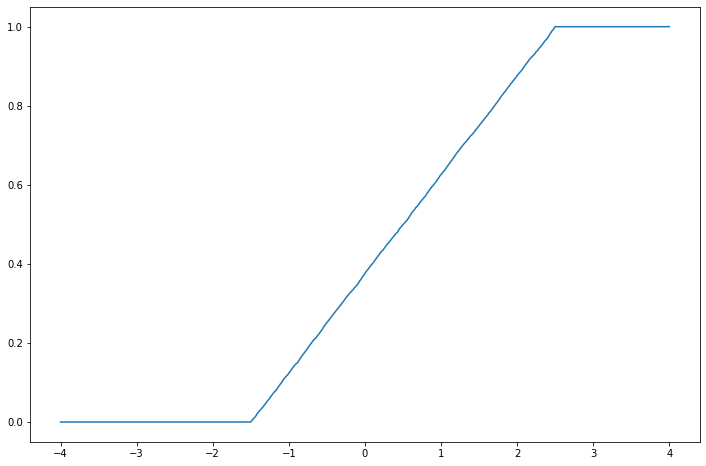

In [35]:
ox = np.linspace(-4, 4, 1000)
oy = np.array([edf(samples=samples, x=x) for x in ox])

plt.plot(ox, oy)

Построим гистограмму, чтобы визуализировать функцию плотности. Вместе с ней построим теоретическую функцию плотности.

In [36]:
def pdf_uniform(a: float, b: float, x: float) -> float:
    """Функция плотности (probability density 
    function) равномерного распределения.
    """
    
    return 1 / (b - a) if a <= x <= b else 0

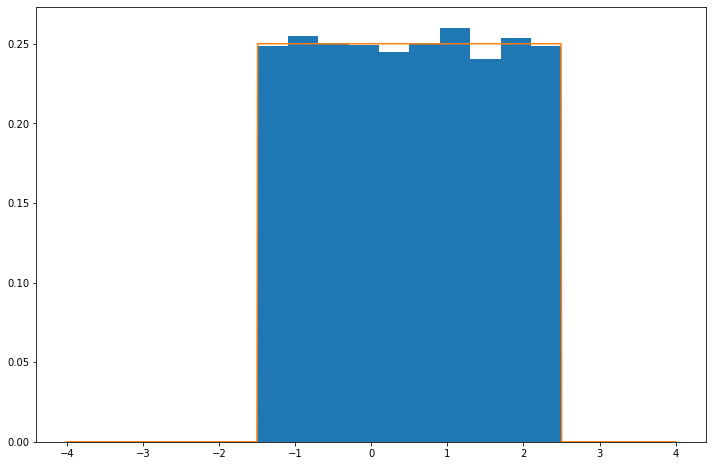

In [37]:
oy = np.array([pdf_uniform(a, b, x) for x in ox])

plt.hist(samples, density=True)
plt.plot(ox, oy)

Математическое ожидание и дисперсия равномерного распределения:

$$M(X) = \dfrac{a + b}{2}, \text{ } D(X) = \dfrac{(b - a)^2}{12}.$$

__Пример 4__

Математическое ожидание распределения из предыдущего примера равно

$$M(X) = \dfrac{a + b}{2} = \dfrac{-1.5 + 2.5}{2} = \dfrac{1}{2}.$$

Посчитаем выборочное среднее от выборки:

In [38]:
samples.mean()

0.5009228273989953

Дисперсия этого распредлеения равна

$$D(X) = \dfrac{(b - a)^2}{12} = \dfrac{4^2}{12} = \dfrac{4}{3} \approx 1.333.$$

Выборочная дисперсия (несмещённая) от выборки:

In [39]:
samples.var(ddof=1)

1.3321961625786765

Непрерывная случайная величина $X$ имеет __нормальное распределение__ с параметрами $a$ и $\sigma > 0$, если её плотность распределения задаётся формулой

$$f(x) = \dfrac{1}{\sigma \sqrt{2 \pi}} \: e^{- \frac{(x - a)^2}{2 \sigma^2}}.$$

Нормальное распределение с параметрами $a = 0$ и $\sigma = 1$ называется __стандартным нормальным распределением__.

Нормальное распределение является одним из наиболее распространённых на практике. Например, нормально распределены:

* рост, вес людей
* показатели IQ
* время прихода на работу
* скорость движения молекул в жидкостях и газах

Как правило, нормально распределёнными являются случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов.

__Пример 5__

Выборку из нормального распределения можно получить с помощью функции `normal` из модуля `numpy.random`. Построим такую выборку с параметрами $a = 3$, $\sigma = 2$.

In [40]:
loc = 3
scale = 2

In [41]:
samples = np.random.normal(loc, scale, size=10000)

print(samples)

[5.19877668 3.14499684 5.11700972 ... 0.24384444 4.04353637 2.6807179 ]


Эмпирическая функция распределения:

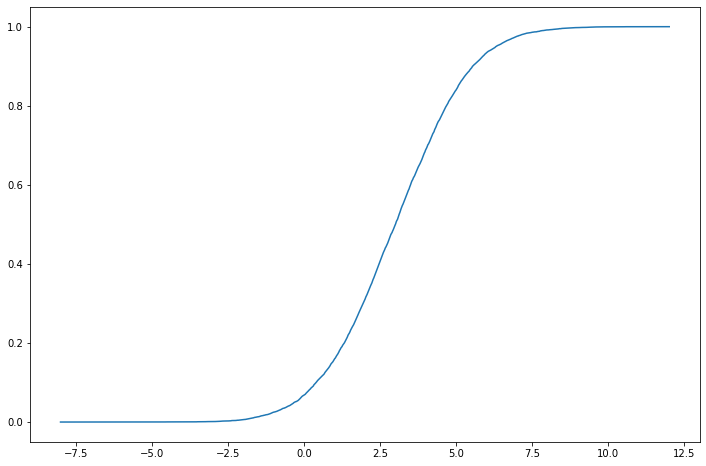

In [42]:
ox = np.linspace(-8, 12, 1000)
oy = np.array([edf(samples, x) for x in ox])

plt.plot(ox, oy)

Гистограмма выборки и теоретическая функция плотности:

In [43]:
def pdf_normal(loc: float, scale: float, x: float) -> float:
    """Функция плотности нормального распределения.
    """
    
    return np.exp(- ((x - loc) ** 2) / (2 * scale ** 2)) / (scale * np.sqrt(2 * np.pi))

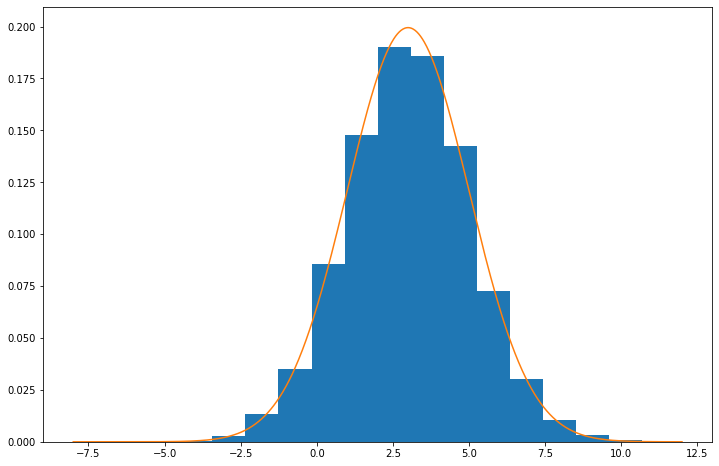

In [44]:
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=15)
plt.plot(ox, oy)

Кстати, в модуле `scipy.stats` есть готовые функции распределения и плотности для многих известных распределений (об этом ниже).

Математическое ожидание и дисперсия нормального распределения:

$$M(X) = a, \: D(X) = \sigma^2.$$

__Пример 6__

Математическое ожидание распределения из предыдущего примера равно 3. Посчитаем выборочное среднее:

In [ ]:
samples.mean()

2.989520655795284

Дисперсия равна 4. Выборочная дисперсия:

In [ ]:
samples.var()

3.9640446444305564

Для вычисления разброса значений нормально распределённой случайной величины можно использовать следующие правила:

* _Интерквартильный размах такой_ величины содержит $50\%$ её вероятностной массы (т.е. с вероятностью $50\%$ данная величина попадает в этот интервал).
* Интервал от $a - \sigma$ до $a + \sigma$ содержит около $68\%$ вероятностной массы.
* От $a - 2\sigma$ до $a + 2\sigma$ — около $95\%$ массы (__правило двух сигм__).
* От $a - 3\sigma$ до $a + 3\sigma$ — около $99.7\%$ массы (__правило трёх сигм__).

In [ ]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

NameError: ignored

In [ ]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416

In [ ]:
stats.norm.cdf(3) - stats.norm.cdf(-3)

0.9973002039367398

__Пример 7__

Вернёмся к данным о хоккеистах и рассмотрим столбец с ростом. Построим его гистограмму.

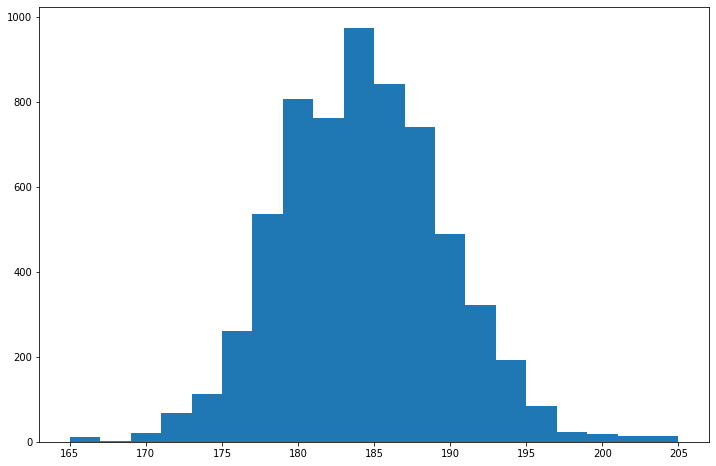

In [ ]:
plt.hist(df['height'], bins=20)
plt.show()

Мы знаем, что рост — одна из величин, которая может распределяться нормально. Восстановим по выборке значения $a$ и $\sigma$ и построим поверх гистограммы теоретическую функцию плотности соответствующего нормального распределения.

In [45]:
loc = df['height'].mean()
scale = df['height'].std()

loc, scale

(183.81150667514305, 5.3838577104380105)

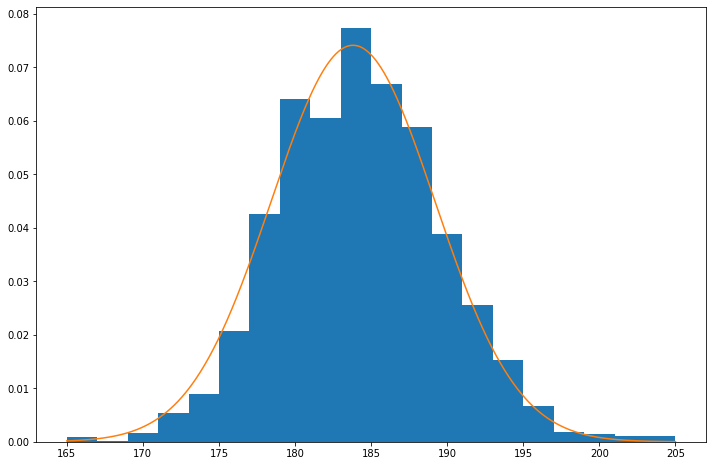

In [ ]:
ox = np.linspace(165, 205, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(df['height'], density=True, bins=20)
plt.plot(ox, oy)

Проверим на этих данных правило двух сигм. В отрезке `(loc - 2 * scale, loc + 2 * scale)` должно содержаться $95\%$ значений.

In [ ]:
two_sigmas_condition = (df['height'] > loc - 2 * scale) & (df['height'] < loc + 2 * scale)

df[two_sigmas_condition].shape[0] / df.shape[0]

0.9556769884638737

__Другие непрерывные распределения__

* __Экспоненциальное__ (или __показательное__): время между последовательными свершениями одного и того же события. Функция распределения:

$$
F(x) = \begin{cases}
1 - e^{- \lambda x}, & x \geq 0, \\
0, & x < 0.
\end{cases}
$$


In [ ]:
from scipy import stats

In [ ]:
norm = stats.norm(loc=8, scale=2)
cdf = norm.cdf

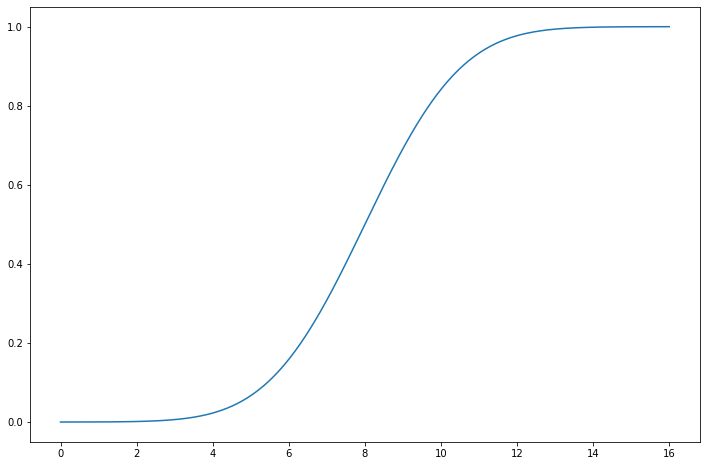

In [ ]:
ox = np.linspace(0, 16, 1000)
oy = np.array([cdf(x) for x in ox])

plt.plot(ox, oy)

А с помощью функции `ppf` получим значение третьего квартиля:

In [ ]:
norm.ppf(0.75)

9.348979500392163

## Задание: построить графики функций и плотности распределений пуассона и экспотенциального распределения

### Центральная предельная теорема

Как правило, случайные величины, описывающие события, которые зависят от большого числа слабо связанных случайных факторов, являются нормально распределёнными.
Это правило хорошо иллюстрирует центральная предельная теорема.

Рассмотрим выборку из $n$ значений случайной величины $X$ и пусть $Y$ — сумма этих значений. Как мы знаем, $Y$ также является случайной величиной. Какое распределение имеет эта величина?

__Центральная предельная теорема__ утверждает: чем больше $n$, тем ближе распределение величины $Y$ к нормальному распределению с параметрами

$$a = n \cdot M(X), \: \sigma^2 = n \cdot D(X).$$

Аналогично, если в качестве $Y$ брать не сумму, а среднее значений выборки, то с увеличением $n$ распределение этого значения будет всё ближе к нормальному распределению с параметрами

$$a = M(X), \: \sigma^2 = \dfrac{D(X)}{n}.$$

Отметим, что центральная предельная теорема работает не только для непрерывных случайных величин, но и для дискретных.

__Пример 8__

Проверим утверждение центральной предельной теоремы на равномерном распределении $X$ с параметрами $a = -1.5$,
$b = 2.5$. Для этого при различных $n$ сформируем $n$ выборок размера, например, $10^4$, а затем посчитаем от них поэлементно среднее. Таким образом, мы получим одну выборку размера $10^4$. Теорема утверждает, что чем больше $n$, тем больше эта выборка похожа на выборку из некоторого нормального распределения $Y$.

Математическое ожидание величины $X$ равно $\dfrac{a + b}{2} = \dfrac{1}{2}$. Дисперсия: 
$\dfrac{(b - a)^2}{12} = \dfrac{4^2}{12} = \dfrac{4}{3}$. Это означает, что нормальное распределение $Y$ имеет параметры $a = \dfrac{1}{2}$, $\sigma^2 = \dfrac{4}{3n}$.

In [ ]:
a = -1.5
b = 2.5

m = (a + b) / 2
d = ((b - a) ** 2) / 12

n_samples = 10 ** 4

In [ ]:
def get_mean_samples_uniform(n):
    samples = np.random.uniform(a, b, size=(n, n_samples))
    
    return samples.mean(axis=0)

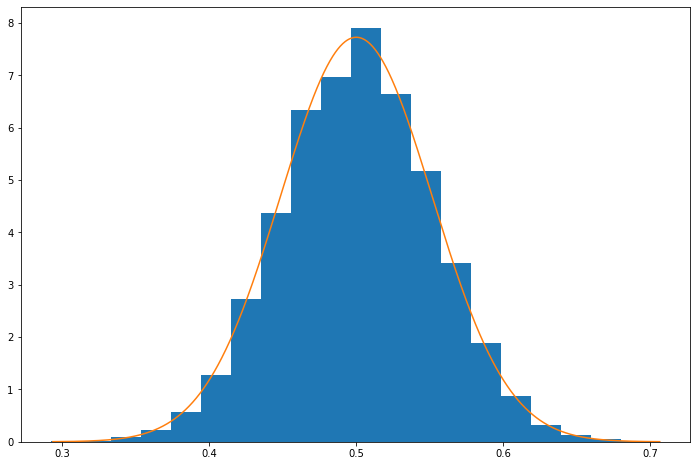

In [ ]:
n = 500

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_uniform(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

__Пример 9__

Аналогично продемонстрируем центральную предельную теорему на примере дискретного распределения, а именно биномиального с параметрами $n = 30$, $p = 0.2$. Параметр $n$ обозначим переменной `n_`, чтобы не конфликтовать с переменной `n`, отвечающей за число случайных величин, от которых берётся среднее.

Математическое ожидание в данном случае равно $np = 6$, дисперсия: $np(1 - p) = 4.8$.

In [ ]:
30 * 0.2 * 0.8

4.800000000000001

In [ ]:
n_ = 30
p = 0.2

m = n_ * p
d = n_ * p * (1 - p)

n_samples = 10 ** 4

In [ ]:
def get_mean_samples_binomial(n):
    samples = np.random.binomial(n_, p, size=(n, n_samples))
    
    return samples.mean(axis=0)

In [ ]:
get_mean_samples_binomial(500)

array([6.016, 6.166, 5.942, ..., 6.092, 6.13 , 6.136])

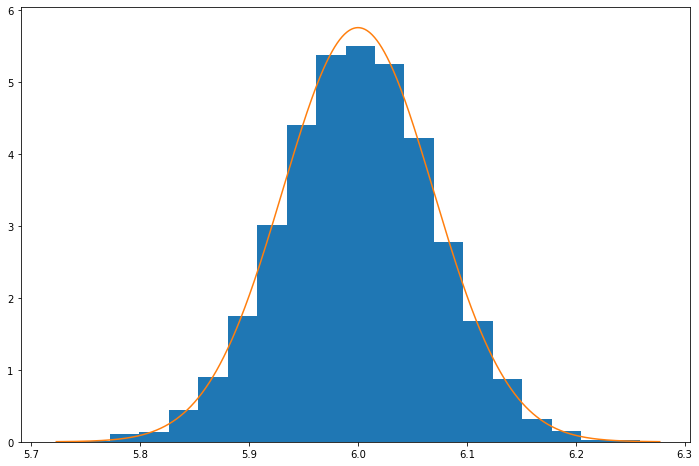

In [ ]:
n = 1000

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_binomial(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)

ПРИМЕР С КУБИКОМ: подбрасывание одного игрального кубика - > Нескольких кубиков


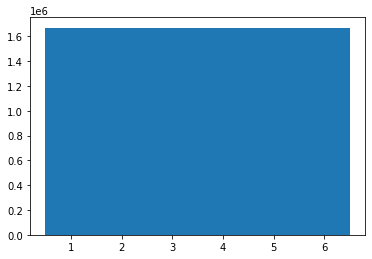

In [ ]:
import random 

n =10000000
mas = []
for i in range(n): mas.append(random.randint(1,6))

plt.hist(mas, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5])

plt.show()


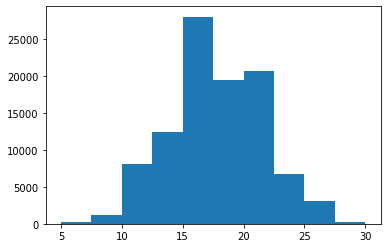

In [ ]:

n =100000
mas = []
for i in range(n): mas.append(random.randint(1, 6) + random.randint(1, 6)+ random.randint(1, 6)+random.randint(1, 6)+random.randint(1, 6))
plt.hist(mas)
plt.show()